## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

 
 

## Reading and Understanding the Data
### Import libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics


In [2]:
#Read dataset
house_set = pd.read_csv("train.csv")

In [3]:
#Print header
print(house_set.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
#Shape
house_set.shape 

(1460, 81)

In [5]:
#info
house_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#columns
columns = list(house_set.columns)
columns

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [8]:
#data types
house_set.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### Data Cleaning

In [9]:
data_null = house_set.isnull().sum() == 0
print(house_set.isnull().sum())
#There are zero empty rows

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [10]:
#print(house_set.isnull().sum()>0)
print(data_null)

Id                True
MSSubClass        True
MSZoning          True
LotFrontage      False
LotArea           True
                 ...  
MoSold            True
YrSold            True
SaleType          True
SaleCondition     True
SalePrice         True
Length: 81, dtype: bool


In [11]:
all_data_na = (house_set.isnull().sum() / len(house_set)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})


In [12]:
print(missing_data)

              Missing Ratio
PoolQC            99.520548
MiscFeature       96.301370
Alley             93.767123
Fence             80.753425
FireplaceQu       47.260274
LotFrontage       17.739726
GarageType         5.547945
GarageYrBlt        5.547945
GarageFinish       5.547945
GarageQual         5.547945
GarageCond         5.547945
BsmtExposure       2.602740
BsmtFinType2       2.602740
BsmtFinType1       2.534247
BsmtCond           2.534247
BsmtQual           2.534247
MasVnrArea         0.547945
MasVnrType         0.547945
Electrical         0.068493


In [13]:
column_na = ['PoolQC','MiscFeature', 'Alley','Fence']
#drop empty columns, missing ratio > 40
for col in column_na:
    house_set  = house_set.drop(col, axis=1)
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
house_set.FireplaceQu = house_set.FireplaceQu.fillna('NA')

In [14]:
#duplicate
duplicates=house_set[house_set.duplicated(['Id'])]
duplicates.count()
#No duplicates

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [15]:
house_set.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

In [16]:
LotFrontage_median = house_set.LotFrontage.median()
LotFrontage_median
house_set.LotFrontage = house_set.LotFrontage.fillna(LotFrontage_median)

### Impute values


In [17]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_set.MasVnrArea = house_set.MasVnrArea.fillna(house_set.MasVnrArea.median())    
#replace Nan values 
house_set.BsmtQual = house_set.BsmtQual.fillna('NA')
house_set.BsmtCond = house_set.BsmtCond.fillna('NA')
house_set.BsmtExposure = house_set.BsmtExposure.fillna('No')
house_set.BsmtFinType1 = house_set.BsmtFinType1.fillna('NA')
house_set.BsmtFinType2 = house_set.BsmtFinType2.fillna('NA')
house_set.Electrical = house_set.Electrical.fillna(house_set.Electrical.mode()[0])    
house_set.GarageType = house_set.GarageType.fillna('NA')
house_set.GarageYrBlt = house_set.GarageYrBlt.fillna(0)
house_set.GarageFinish = house_set.GarageFinish.fillna('NA')
house_set.GarageQual = house_set.GarageQual.fillna('NA')
house_set.GarageQual = house_set.GarageQual.fillna('NA')
house_set.GarageCond = house_set.GarageCond.fillna('NA')
house_set.MasVnrType = house_set.MasVnrType.fillna('None')


In [18]:
#check missing values again
house_set.isnull().sum()[house_set.isnull().sum()>0]


Series([], dtype: int64)

In [19]:
#Deriving values
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_set['Age_House'] = house_set.YrSold - house_set.YearBuilt
#Drop YrSold, YearBuilt after HouseAge
house_set=house_set.drop(columns=['YrSold', 'YearBuilt'])


In [20]:
#Numeric values to categorical
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_set = house_set.astype(convert_dict)
house_set = house_set.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
house_set = house_set.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
house_set = house_set.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})
house_set = house_set.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})
house_set = house_set.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
house_set = house_set.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
house_set = house_set.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})


In [21]:
house_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

Univariate and Bivariate Analysis

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

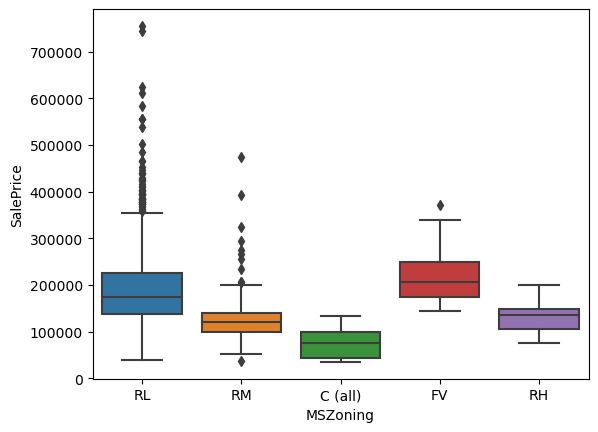

In [22]:
sns.boxplot( x='MSZoning', y='SalePrice', data=house_set )
#A	Agriculture
#       C	Commercial
#       FV	Floating Village Residential
#       I	Industrial
#       RH	Residential High Density
#       RL	Residential Low Density
#       RP	Residential Low Density Park 
#       RM	Residential Medium Density
#	

<Axes: xlabel='Street', ylabel='SalePrice'>

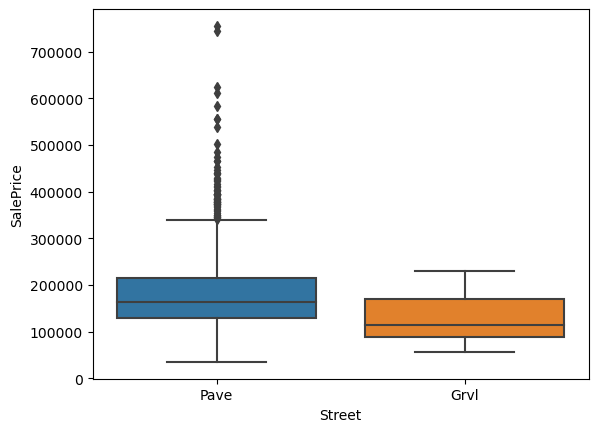

In [23]:
sns.boxplot( x='Street', y='SalePrice', data=house_set )


<Axes: xlabel='LotShape', ylabel='SalePrice'>

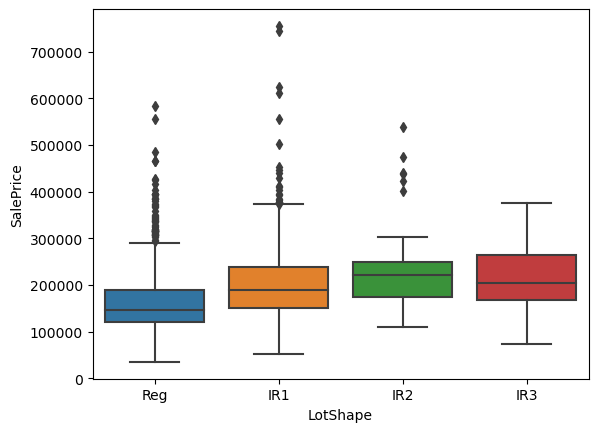

In [24]:
sns.boxplot( x='LotShape', y='SalePrice', data=house_set )


<Axes: xlabel='LandContour', ylabel='SalePrice'>

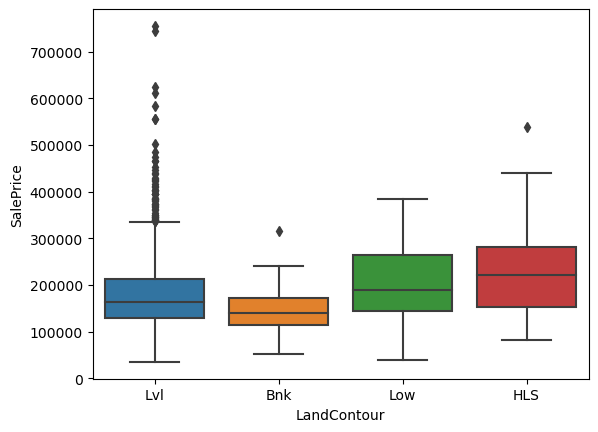

In [25]:
sns.boxplot( x='LandContour', y='SalePrice', data=house_set )


<Axes: xlabel='Utilities', ylabel='SalePrice'>

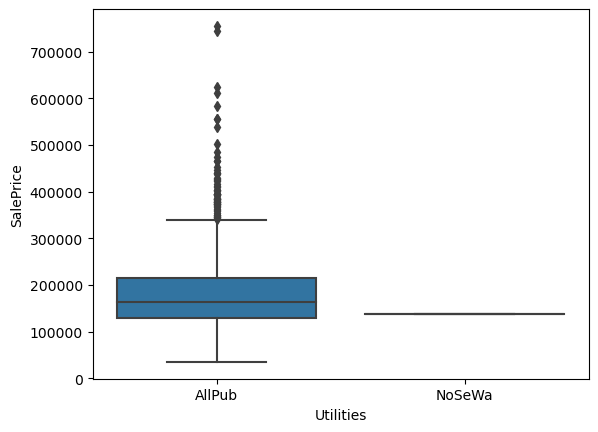

In [26]:
sns.boxplot( x='Utilities', y='SalePrice', data=house_set )


### Check value counts

In [27]:
house_set.Utilities.value_counts()


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [28]:
house_set.MSZoning.value_counts()


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [29]:
house_set.Street.value_counts()


Pave    1454
Grvl       6
Name: Street, dtype: int64

In [30]:
house_set.LotShape.value_counts()


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [31]:
house_set.LandContour.value_counts()


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [32]:
house_set.LotConfig.value_counts()


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [33]:
house_set.LandSlope.value_counts()


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [34]:
house_set.Neighborhood.value_counts()


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [35]:
house_set.GarageYrBlt.value_counts()


0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [36]:
house_set.LotFrontage.value_counts()


69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

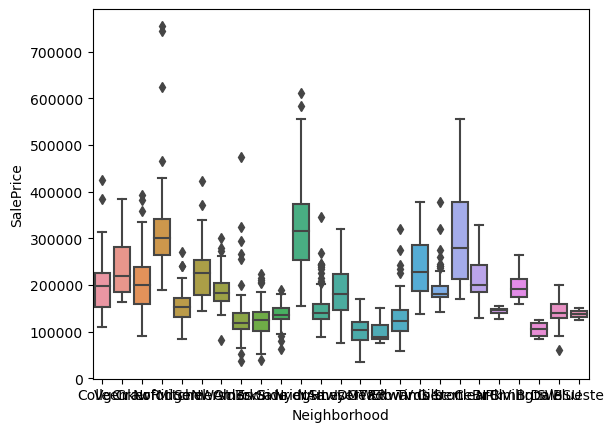

In [37]:
sns.boxplot( x='Neighborhood', y='SalePrice', data=house_set )


In [38]:
house_set=house_set.drop(columns=['Id', 'Street', 'Utilities', 'LandContour', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

### Check multicollinearity

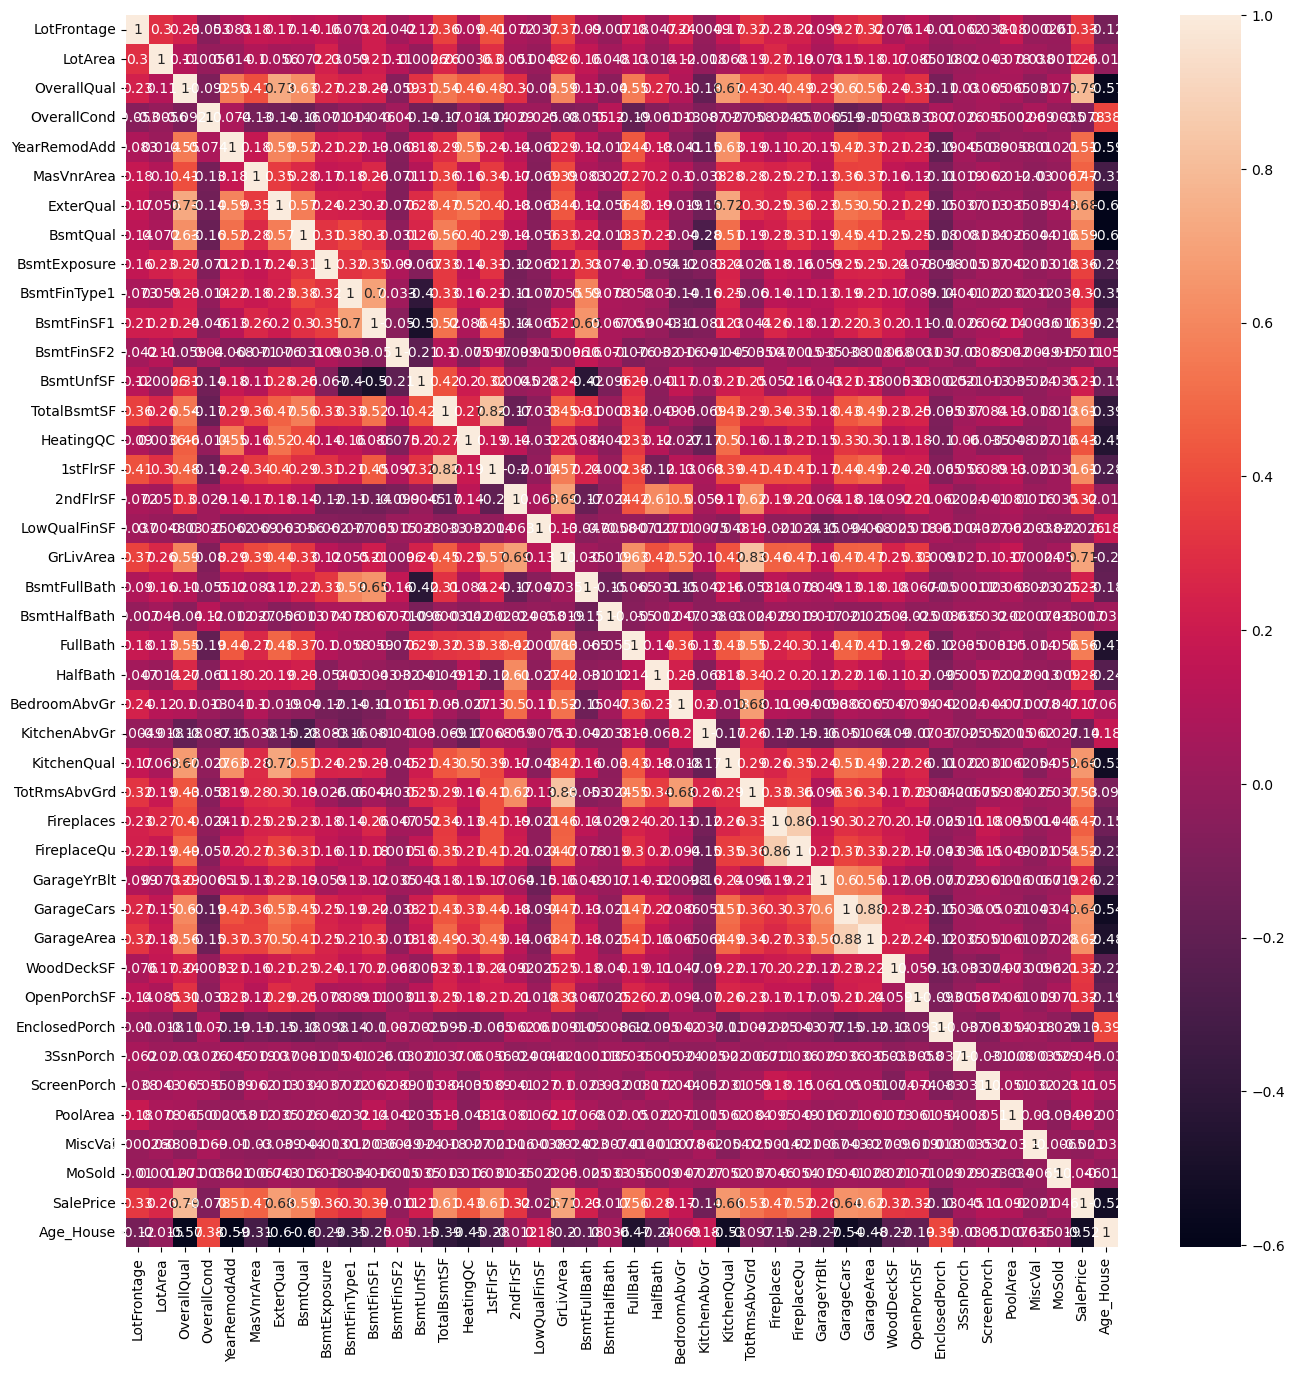

In [39]:
plt.figure(figsize=(16,16))
sns.heatmap(house_set[list(house_set.dtypes[house_set.dtypes!='object'].index)].corr(),annot=True)
plt.show()


In [40]:
#Get categorical variables
categ_vals = house_set.select_dtypes(include=['object'])
categ_vals.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,GarageFinish
0,60,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,RFn
1,20,RL,Reg,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,CBlock,Attchd,RFn
2,60,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,RFn
3,70,RL,IR1,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,Detchd,Unf
4,60,RL,IR1,FR2,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,RFn


In [41]:
# convert into dummies
data_dummies = pd.get_dummies(categ_vals, drop_first=True)
data_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [42]:
# Droping the original categorical column and concatenating dummies
df = house_set.drop(list(categ_vals.columns), axis=1)
df = pd.concat([df,data_dummies], axis=1)
df.shape

(1460, 149)

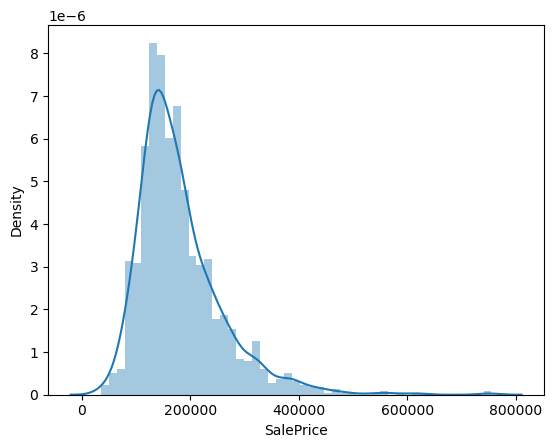

In [43]:
#Check distribution of target variable
sns.distplot(house_set.SalePrice)
plt.show()

### Train and Test Split

In [44]:
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [45]:
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(438, 149)


### scale data

In [46]:
#get numeric values
numeric_vals = df.select_dtypes(include=['float64','int64']).columns
scaler = StandardScaler()

df_train[numeric_vals] = scaler.fit_transform(df_train[numeric_vals])

In [47]:
y_train = df_train.pop('SalePrice')
X_train = df_train

### RFE

In [48]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select = 35)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 54),
 ('LotArea', False, 51),
 ('OverallQual', True, 1),
 ('OverallCond', False, 41),
 ('YearRemodAdd', False, 83),
 ('MasVnrArea', False, 57),
 ('ExterQual', False, 53),
 ('BsmtQual', False, 23),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 55),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 114),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 52),
 ('BsmtHalfBath', False, 93),
 ('FullBath', False, 61),
 ('HalfBath', False, 63),
 ('BedroomAbvGr', False, 84),
 ('KitchenAbvGr', False, 65),
 ('KitchenQual', False, 15),
 ('TotRmsAbvGrd', False, 82),
 ('Fireplaces', False, 109),
 ('FireplaceQu', False, 58),
 ('GarageYrBlt', False, 69),
 ('GarageCars', True, 1),
 ('GarageArea', False, 103),
 ('WoodDeckSF', False, 94),
 ('OpenPorchSF', False, 101),
 ('EnclosedPorch', False, 99),
 ('3SsnPorch', False, 76),

In [49]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath',
       ...
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=113)

In [50]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
#X_test = X_test[col]


In [51]:
#col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
#X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     155.7
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:26:29   Log-Likelihood:                -558.59
No. Observations:                1021   AIC:                             1179.
Df Residuals:                     990   BIC:                             1332.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1697 

In [52]:
X_train_new = X_train_rfe.drop(['Exterior1st_CBlock'],axis=1)


In [53]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     155.7
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:26:29   Log-Likelihood:                -558.59
No. Observations:                1021   AIC:                             1179.
Df Residuals:                     990   BIC:                             1332.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1697 

In [54]:
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     161.2
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:26:29   Log-Likelihood:                -558.59
No. Observations:                1021   AIC:                             1177.
Df Residuals:                     991   BIC:                             1325.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1696 

In [55]:
X_train_new.shape 


(1021, 34)

In [56]:
X_train_new = X_train_new.drop(['BsmtFinSF2'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     161.2
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:26:29   Log-Likelihood:                -558.59
No. Observations:                1021   AIC:                             1177.
Df Residuals:                     991   BIC:                             1325.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1696 

In [57]:
X_train_new = X_train_new.drop(['BsmtFinSF1'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     166.8
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:26:29   Log-Likelihood:                -559.55
No. Observations:                1021   AIC:                             1177.
Df Residuals:                     992   BIC:                             1320.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1705 

In [58]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     166.8
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:26:29   Log-Likelihood:                -559.55
No. Observations:                1021   AIC:                             1177.
Df Residuals:                     992   BIC:                             1320.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1705 

In [59]:
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     173.1
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:26:29   Log-Likelihood:                -559.58
No. Observations:                1021   AIC:                             1175.
Df Residuals:                     993   BIC:                             1313.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1703 

In [60]:
X_train_rfe = X_train_rfe.drop(['Exterior1st_CemntBd'],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     160.9
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:26:29   Log-Likelihood:                -559.54
No. Observations:                1021   AIC:                             1179.
Df Residuals:                     991   BIC:                             1327.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1701 

In [61]:
X_train_new = X_train_new.drop(['Exterior1st_ImStucc'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.3
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:26:29   Log-Likelihood:                -561.14
No. Observations:                1021   AIC:                             1176.
Df Residuals:                     994   BIC:                             1309.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1701 

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
28,GarageFinish_NA,inf
8,GrLivArea,inf
27,GarageType_NA,inf
5,1stFlrSF,inf
6,2ndFlrSF,inf
7,LowQualFinSF,inf
24,Exterior2nd_CmentBd,18.43
23,Exterior1st_CemntBd,18.35
0,const,4.76
4,TotalBsmtSF,4.01


In [63]:
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     186.3
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:26:29   Log-Likelihood:                -562.02
No. Observations:                1021   AIC:                             1176.
Df Residuals:                     995   BIC:                             1304.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1705      0.029     -5.872      0.000      -0.227      -0.114
OverallQual              0.3329      0.021     15.551      0.000       0.291       0.375
BsmtExposure             0.1322      0.016      8.267      0.000       0.101       0.164
BsmtUnfSF               -0.0804      0.016     -5.149      0.000      -0.111      -0.050
TotalBsmtSF              0.0952      0.027      3.576      0.000       0.043       0.147
1stFlrSF                 0.0880      0.020      4.351      0.000       0.048       0.128
2ndFlrSF                 0.1894      0.018     10.258      0.000       0.153       0.226
LowQualFinSF            -0.0210      0.014     -1.515      0.130      -0.048       0.006
GrLivArea                0.2189      0.013     17.149      0.000       0.194       0.244
GarageCars               0.1593      0.022      7.404      0.000       0.117       0.202
MSSubClass_90           -0.3479      0.073     -4.755      0.000      -0.491      -0.204
MSSubClass_160          -0.1981      0.080     -2.478      0.013      -0.355      -0.041
MSSubClass_190          -0.2790      0.090     -3.106      0.002      -0.455      -0.103
LotShape_IR3            -0.4446      0.146     -3.043      0.002      -0.731      -0.158
LotConfig_CulDSac        0.1886      0.056      3.370      0.001       0.079       0.298
LotConfig_FR3           -0.2820      0.248     -1.139      0.255      -0.768       0.204
Neighborhood_BrDale     -0.0973      0.146     -0.667      0.505      -0.384       0.189
Neighborhood_Edwards    -0.1432      0.053     -2.683      0.007      -0.248      -0.038
Neighborhood_NPkVill    -0.1201      0.178     -0.673      0.501      -0.470       0.230
Neighborhood_NoRidge     0.5882      0.083      7.096      0.000       0.426       0.751
Neighborhood_NridgHt     0.5364      0.064      8.343      0.000       0.410       0.663
HouseStyle_1Story        0.2929      0.048      6.106      0.000       0.199       0.387
HouseStyle_2.5Unf       -0.3849      0.153     -2.512      0.012      -0.686      -0.084
Exterior2nd_CmentBd      0.1314      0.073      1.799      0.072      -0.012       0.275
Exterior2nd_ImStucc      0.1798      0.154      1.169      0.243      -0.122       0.481
Exterior2nd_Stucco      -0.3561      0.096     -3.712      0.000      -0.544      -0.168
GarageType_NA            0.1339      0.038      3.482      0.001       0.058       0.209
GarageFinish_NA          0.1339      0.038      3.482      0.001       0.058       0.209
==============================================================================
Omnibus:                      334.693   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21784.517
Skew:                          -0.612   Prob(JB):                         0.00
Kurtosis

In [64]:
X_train_new = X_train_new.drop(['LowQualFinSF'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     186.3
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:26:29   Log-Likelihood:                -562.02
No. Observations:                1021   AIC:                             1176.
Df Residuals:                     995   BIC:                             1304.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1705      0.029     -5.872      0.000      -0.227      -0.114
OverallQual              0.3329      0.021     15.551      0.000       0.291       0.375
BsmtExposure             0.1322      0.016      8.267      0.000       0.101       0.164
BsmtUnfSF               -0.0804      0.016     -5.149      0.000      -0.111      -0.050
TotalBsmtSF              0.0952      0.027      3.576      0.000       0.043       0.147
1stFlrSF                 0.2613      0.119      2.202      0.028       0.028       0.494
2ndFlrSF                 0.3790      0.126      3.001      0.003       0.131       0.627
GrLivArea               -0.0128      0.153     -0.084      0.933      -0.313       0.287
GarageCars               0.1593      0.022      7.404      0.000       0.117       0.202
MSSubClass_90           -0.3479      0.073     -4.755      0.000      -0.491      -0.204
MSSubClass_160          -0.1981      0.080     -2.478      0.013      -0.355      -0.041
MSSubClass_190          -0.2790      0.090     -3.106      0.002      -0.455      -0.103
LotShape_IR3            -0.4446      0.146     -3.043      0.002      -0.731      -0.158
LotConfig_CulDSac        0.1886      0.056      3.370      0.001       0.079       0.298
LotConfig_FR3           -0.2820      0.248     -1.139      0.255      -0.768       0.204
Neighborhood_BrDale     -0.0973      0.146     -0.667      0.505      -0.384       0.189
Neighborhood_Edwards    -0.1432      0.053     -2.683      0.007      -0.248      -0.038
Neighborhood_NPkVill    -0.1201      0.178     -0.673      0.501      -0.470       0.230
Neighborhood_NoRidge     0.5882      0.083      7.096      0.000       0.426       0.751
Neighborhood_NridgHt     0.5364      0.064      8.343      0.000       0.410       0.663
HouseStyle_1Story        0.2929      0.048      6.106      0.000       0.199       0.387
HouseStyle_2.5Unf       -0.3849      0.153     -2.512      0.012      -0.686      -0.084
Exterior2nd_CmentBd      0.1314      0.073      1.799      0.072      -0.012       0.275
Exterior2nd_ImStucc      0.1798      0.154      1.169      0.243      -0.122       0.481
Exterior2nd_Stucco      -0.3561      0.096     -3.712      0.000      -0.544      -0.168
GarageType_NA            0.1339      0.038      3.482      0.001       0.058       0.209
GarageFinish_NA          0.1339      0.038      3.482      0.001       0.058       0.209
==============================================================================
Omnibus:                      334.693   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21784.517
Skew:                          -0.612   Prob(JB):                         0.00
Kurtosis:                      25.596   Cond. No.                     1.54e+16
==================

In [65]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
25,GarageFinish_NA,inf
24,GarageType_NA,inf
6,GrLivArea,130.51
5,2ndFlrSF,90.15
4,1stFlrSF,77.96
3,TotalBsmtSF,3.97
7,GarageCars,2.61
0,OverallQual,2.59
19,HouseStyle_1Story,2.17
9,MSSubClass_160,1.59


In [66]:
X_train_new = X_train_new.drop(['GrLivArea'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.2
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:26:30   Log-Likelihood:                -562.03
No. Observations:                1021   AIC:                             1174.
Df Residuals:                     996   BIC:                             1297.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1708      0.029     -5.926      0.000      -0.227      -0.114
OverallQual              0.3330      0.021     15.575      0.000       0.291       0.375
BsmtExposure             0.1323      0.016      8.297      0.000       0.101       0.164
BsmtUnfSF               -0.0805      0.016     -5.160      0.000      -0.111      -0.050
TotalBsmtSF              0.0951      0.027      3.576      0.000       0.043       0.147
1stFlrSF                 0.2516      0.026      9.804      0.000       0.201       0.302
2ndFlrSF                 0.3687      0.025     14.885      0.000       0.320       0.417
GarageCars               0.1593      0.021      7.411      0.000       0.117       0.202
MSSubClass_90           -0.3475      0.073     -4.761      0.000      -0.491      -0.204
MSSubClass_160          -0.1982      0.080     -2.479      0.013      -0.355      -0.041
MSSubClass_190          -0.2792      0.090     -3.112      0.002      -0.455      -0.103
LotShape_IR3            -0.4445      0.146     -3.044      0.002      -0.731      -0.158
LotConfig_CulDSac        0.1887      0.056      3.374      0.001       0.079       0.298
LotConfig_FR3           -0.2819      0.248     -1.139      0.255      -0.768       0.204
Neighborhood_BrDale     -0.0970      0.146     -0.665      0.506      -0.383       0.189
Neighborhood_Edwards    -0.1429      0.053     -2.686      0.007      -0.247      -0.039
Neighborhood_NPkVill    -0.1200      0.178     -0.673      0.501      -0.470       0.230
Neighborhood_NoRidge     0.5884      0.083      7.104      0.000       0.426       0.751
Neighborhood_NridgHt     0.5365      0.064      8.349      0.000       0.410       0.663
HouseStyle_1Story        0.2935      0.047      6.179      0.000       0.200       0.387
HouseStyle_2.5Unf       -0.3845      0.153     -2.512      0.012      -0.685      -0.084
Exterior2nd_CmentBd      0.1317      0.073      1.804      0.071      -0.012       0.275
Exterior2nd_ImStucc      0.1797      0.154      1.170      0.242      -0.122       0.481
Exterior2nd_Stucco      -0.3563      0.096     -3.718      0.000      -0.544      -0.168
GarageType_NA            0.1335      0.038      3.507      0.000       0.059       0.208
GarageFinish_NA          0.1335      0.038      3.507      0.000       0.059       0.208
==============================================================================
Omnibus:                      334.550   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21767.586
Skew:                          -0.611   Prob(JB):                         0.00
Kurtosis:                      25.587   Cond. No.                     1.25e+16
==============================================================================

Notes:
[1] Standard Errors 

In [67]:
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.2
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:26:30   Log-Likelihood:                -562.03
No. Observations:                1021   AIC:                             1174.
Df Residuals:                     996   BIC:                             1297.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1708      0.029     -5.926      0.000      -0.227      -0.114
OverallQual              0.3330      0.021     15.575      0.000       0.291       0.375
BsmtExposure             0.1323      0.016      8.297      0.000       0.101       0.164
BsmtUnfSF               -0.0805      0.016     -5.160      0.000      -0.111      -0.050
TotalBsmtSF              0.0951      0.027      3.576      0.000       0.043       0.147
1stFlrSF                 0.2516      0.026      9.804      0.000       0.201       0.302
2ndFlrSF                 0.3687      0.025     14.885      0.000       0.320       0.417
GarageCars               0.1593      0.021      7.411      0.000       0.117       0.202
MSSubClass_90           -0.3475      0.073     -4.761      0.000      -0.491      -0.204
MSSubClass_160          -0.1982      0.080     -2.479      0.013      -0.355      -0.041
MSSubClass_190          -0.2792      0.090     -3.112      0.002      -0.455      -0.103
LotShape_IR3            -0.4445      0.146     -3.044      0.002      -0.731      -0.158
LotConfig_CulDSac        0.1887      0.056      3.374      0.001       0.079       0.298
LotConfig_FR3           -0.2819      0.248     -1.139      0.255      -0.768       0.204
Neighborhood_BrDale     -0.0970      0.146     -0.665      0.506      -0.383       0.189
Neighborhood_Edwards    -0.1429      0.053     -2.686      0.007      -0.247      -0.039
Neighborhood_NPkVill    -0.1200      0.178     -0.673      0.501      -0.470       0.230
Neighborhood_NoRidge     0.5884      0.083      7.104      0.000       0.426       0.751
Neighborhood_NridgHt     0.5365      0.064      8.349      0.000       0.410       0.663
HouseStyle_1Story        0.2935      0.047      6.179      0.000       0.200       0.387
HouseStyle_2.5Unf       -0.3845      0.153     -2.512      0.012      -0.685      -0.084
Exterior2nd_CmentBd      0.1317      0.073      1.804      0.071      -0.012       0.275
Exterior2nd_ImStucc      0.1797      0.154      1.170      0.242      -0.122       0.481
Exterior2nd_Stucco      -0.3563      0.096     -3.718      0.000      -0.544      -0.168
GarageType_NA            0.2669      0.076      3.507      0.000       0.118       0.416
==============================================================================
Omnibus:                      334.550   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21767.586
Skew:                          -0.611   Prob(JB):                         0.00
Kurtosis:                      25.587   Cond. No.                         32.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
X_train_new = X_train_new.drop(['GarageType_NA'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     199.9
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:26:30   Log-Likelihood:                -568.29
No. Observations:                1021   AIC:                             1185.
Df Residuals:                     997   BIC:                             1303.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1681      0.029     -5.804      0.000      -0.225      -0.111
OverallQual              0.3374      0.021     15.720      0.000       0.295       0.380
BsmtExposure             0.1394      0.016      8.769      0.000       0.108       0.171
BsmtUnfSF               -0.0749      0.016     -4.800      0.000      -0.106      -0.044
TotalBsmtSF              0.0962      0.027      3.597      0.000       0.044       0.149
1stFlrSF                 0.2503      0.026      9.699      0.000       0.200       0.301
2ndFlrSF                 0.3763      0.025     15.169      0.000       0.328       0.425
GarageCars               0.1152      0.018      6.571      0.000       0.081       0.150
MSSubClass_90           -0.2957      0.072     -4.114      0.000      -0.437      -0.155
MSSubClass_160          -0.1966      0.080     -2.446      0.015      -0.354      -0.039
MSSubClass_190          -0.2368      0.089     -2.648      0.008      -0.412      -0.061
LotShape_IR3            -0.4438      0.147     -3.022      0.003      -0.732      -0.156
LotConfig_CulDSac        0.1908      0.056      3.393      0.001       0.080       0.301
LotConfig_FR3           -0.2886      0.249     -1.159      0.247      -0.777       0.200
Neighborhood_BrDale     -0.1221      0.146     -0.834      0.405      -0.410       0.165
Neighborhood_Edwards    -0.1300      0.053     -2.437      0.015      -0.235      -0.025
Neighborhood_NPkVill    -0.1093      0.179     -0.610      0.542      -0.461       0.242
Neighborhood_NoRidge     0.6142      0.083      7.403      0.000       0.451       0.777
Neighborhood_NridgHt     0.5610      0.064      8.734      0.000       0.435       0.687
HouseStyle_1Story        0.3042      0.048      6.382      0.000       0.211       0.398
HouseStyle_2.5Unf       -0.3923      0.154     -2.549      0.011      -0.694      -0.090
Exterior2nd_CmentBd      0.1548      0.073      2.118      0.034       0.011       0.298
Exterior2nd_ImStucc      0.1632      0.154      1.056      0.291      -0.140       0.466
Exterior2nd_Stucco      -0.3459      0.096     -3.590      0.000      -0.535      -0.157
==============================================================================
Omnibus:                      335.753   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21715.345
Skew:                          -0.620   Prob(JB):                         0.00
Kurtosis:                      25.559   Cond. No.                         32.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,TotalBsmtSF,3.97
4,1stFlrSF,3.65
0,OverallQual,2.58
5,2ndFlrSF,2.39
18,HouseStyle_1Story,2.11
6,GarageCars,1.71
8,MSSubClass_160,1.59
13,Neighborhood_BrDale,1.41
1,BsmtExposure,1.37
2,BsmtUnfSF,1.36


Text(0.5, 0, 'Errors')

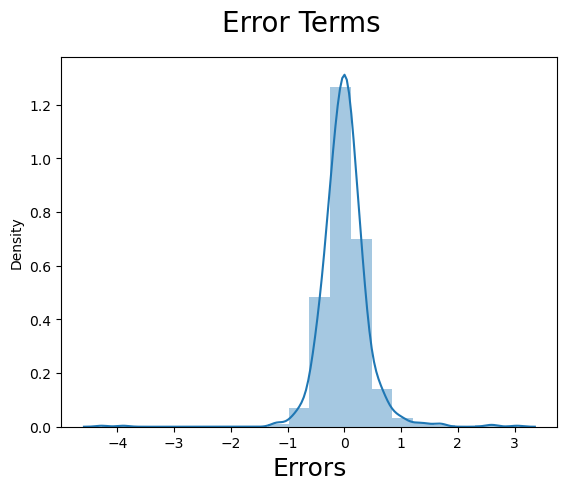

In [70]:
y_train_cnst = lm.predict(X_train_lm)
# Importing the required libraries for plots.
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

181.97537097130396
0.178232488708427
0.42217589782983467


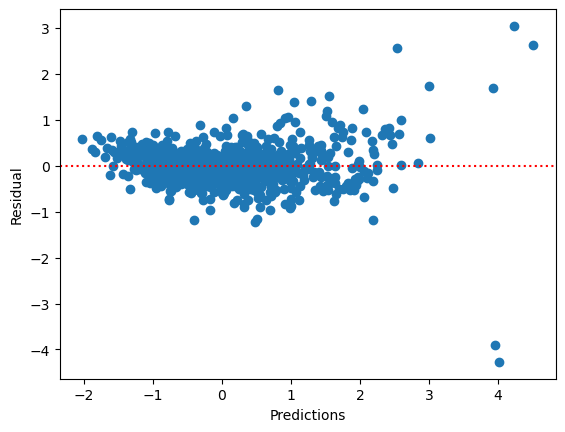

In [71]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()


In [72]:
#scale Test set
df_test[numeric_vals] = scaler.transform(df_test[numeric_vals])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.432493,-0.144189,-1.494617,0.383154,-0.675945,-0.558025,-0.698260,-0.532226,-0.651804,0.667136,...,0,0,0,0,0,1,0,0,0,1
57,0.881585,0.112505,0.649651,-0.533005,0.924407,-0.558025,1.053395,0.579028,-0.651804,-1.226251,...,0,1,0,0,0,0,0,0,1,0
780,-0.296554,-0.253368,0.649651,-0.533005,0.536443,-0.355087,-0.698260,0.579028,-0.651804,-1.226251,...,0,1,0,0,0,0,0,0,0,0
382,0.428455,-0.120412,0.649651,-0.533005,1.021398,-0.558025,1.053395,0.579028,1.238798,-1.226251,...,0,1,0,0,0,0,0,0,1,0
1170,0.292515,-0.058786,-0.065105,0.383154,-0.384972,-0.558025,-0.698260,-0.532226,1.238798,0.667136,...,0,1,0,0,0,0,0,0,0,0


In [73]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.045880,0.010183,0.018120,-0.018450,-0.013062,-0.023160,-0.018394,0.036086,-0.107932,-0.073144,...,0.002283,0.611872,0.015982,0.052511,0.004566,0.255708,0.052511,0.052511,0.315068,0.399543
std,0.993029,0.892334,0.961661,1.064377,1.004717,0.879108,1.019449,0.910614,0.934437,0.990033,...,0.047782,0.487881,0.125548,0.223311,0.067496,0.436757,0.223311,0.223311,0.465074,0.490365
min,-2.199702,-0.891462,-3.638884,-3.281483,-1.694350,-0.558025,-2.449915,-3.865989,-0.651804,-1.699598,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.432493,-0.265305,-0.779861,-0.533005,-0.918422,-0.558025,-0.698260,-0.532226,-0.651804,-1.226251,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.024676,-0.106582,-0.065105,-0.533005,0.390956,-0.558025,-0.698260,0.579028,-0.651804,0.193789,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.473768,0.117842,0.649651,0.383154,0.924407,0.371218,1.053395,0.579028,0.293497,1.140483,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,11.031706,14.413079,2.793918,3.131631,1.215380,4.360551,2.805050,1.690282,2.184098,1.140483,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
#create y_test and X_test
y_test = df_test.pop('SalePrice') 
X_test = df_test
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GarageCars', 'MSSubClass_90', 'MSSubClass_160',
       'MSSubClass_190', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3',
       'Neighborhood_BrDale', 'Neighborhood_Edwards', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'HouseStyle_1Story',
       'HouseStyle_2.5Unf', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc',
       'Exterior2nd_Stucco'],
      dtype='object')

In [75]:
#X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     96.05
Date:                Fri, 20 Oct 2023   Prob (F-statistic):          4.09e-150
Time:                        12:26:30   Log-Likelihood:                -223.59
No. Observations:                 438   AIC:                             495.2
Df Residuals:                     414   BIC:                             593.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1172      0.049     -2.401      0.017      -0.213      -0.021
OverallQual              0.3513      0.034     10.335      0.000       0.284       0.418
BsmtExposure             0.0929      0.024      3.840      0.000       0.045       0.140
BsmtUnfSF               -0.1347      0.024     -5.587      0.000      -0.182      -0.087
TotalBsmtSF              0.2157      0.048      4.466      0.000       0.121       0.311
1stFlrSF                 0.2639      0.042      6.274      0.000       0.181       0.347
2ndFlrSF                 0.3962      0.039     10.075      0.000       0.319       0.473
GarageCars               0.1313      0.028      4.614      0.000       0.075       0.187
MSSubClass_90           -0.3046      0.137     -2.218      0.027      -0.574      -0.035
MSSubClass_160          -0.3826      0.132     -2.893      0.004      -0.643      -0.123
MSSubClass_190           0.0260      0.199      0.131      0.896      -0.365       0.417
LotShape_IR3            -0.0227      0.419     -0.054      0.957      -0.847       0.801
LotConfig_CulDSac        0.2589      0.083      3.129      0.002       0.096       0.422
LotConfig_FR3           -0.8965      0.429     -2.089      0.037      -1.740      -0.053
Neighborhood_BrDale      0.2139      0.244      0.876      0.382      -0.266       0.694
Neighborhood_Edwards    -0.0067      0.094     -0.072      0.943      -0.191       0.177
Neighborhood_NPkVill     0.0371      0.256      0.145      0.885      -0.466       0.540
Neighborhood_NoRidge     0.1551      0.184      0.842      0.400      -0.207       0.517
Neighborhood_NridgHt     0.7741      0.112      6.904      0.000       0.554       0.994
HouseStyle_1Story        0.2129      0.079      2.694      0.007       0.058       0.368
HouseStyle_2.5Unf       -0.5018      0.252     -1.990      0.047      -0.997      -0.006
Exterior2nd_CmentBd      0.2869      0.096      2.986      0.003       0.098       0.476
Exterior2nd_ImStucc      0.4636      0.309      1.499      0.135      -0.144       1.072
Exterior2nd_Stucco       0.0302      0.188      0.161      0.872      -0.339       0.400
==============================================================================
Omnibus:                      146.337   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1164.067
Skew:                           1.203   Prob(JB):                    1.68e-253
Kurtosis:                      10.615   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Making predictions
y_pred = lm.predict(X_test_new)


In [77]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)
#drop the const
#X_test_new = X_test_new.drop(['const'], axis=1)
#check final VIf of 9 columns
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

81.53764090608085
0.1861589975024677
0.4314614669961475


,Features,VIF
3,TotalBsmtSF,3.97
4,1stFlrSF,3.65
0,OverallQual,2.58
5,2ndFlrSF,2.39
18,HouseStyle_1Story,2.11
6,GarageCars,1.71
8,MSSubClass_160,1.59
13,Neighborhood_BrDale,1.41
1,BsmtExposure,1.37
2,BsmtUnfSF,1.36


Text(0, 0.5, 'y_pred')

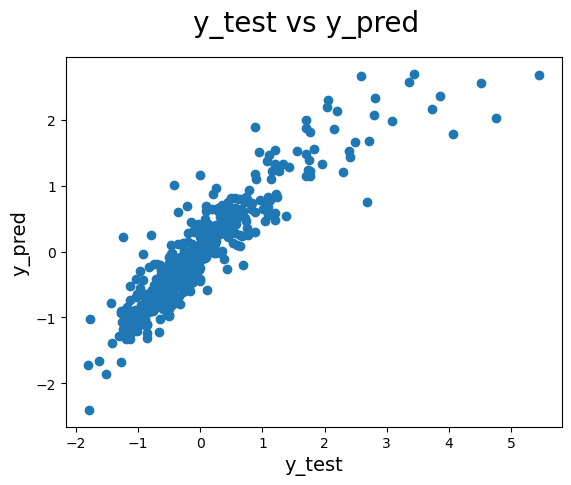

In [78]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=14)                          # X-label
plt.ylabel('y_pred', fontsize=14)                          # Y-label

In [79]:
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GarageCars', 'MSSubClass_90', 'MSSubClass_160',
       'MSSubClass_190', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3',
       'Neighborhood_BrDale', 'Neighborhood_Edwards', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'HouseStyle_1Story',
       'HouseStyle_2.5Unf', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc',
       'Exterior2nd_Stucco'],
      dtype='object')

In [80]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.821767511291573
0.8192202180999624
181.97537097130396
81.53764090608085
0.178232488708427
0.1861589975024677


### Ridge

In [81]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [82]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)


{'alpha': 20}


In [83]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 0.35967834  0.1307296  -0.07068776  0.11471733  0.24158611  0.33605258
  0.13263203 -0.18445697 -0.14980694 -0.12161923 -0.14671627  0.1438201
 -0.03335668 -0.05383858 -0.10295647 -0.03442915  0.37899138  0.37405893
  0.23239139 -0.11321074  0.09239019  0.05267767 -0.18460915]


In [84]:
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8146606436960613
0.8171654658423194
189.2314827863214
82.46440190763624
0.1853393563039387
0.18827489020008276


In [85]:
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
23,20,-0.265763,-0.278166,1
24,50,-0.270155,-0.279220,2
22,10.0,-0.264418,-0.279396,3
21,9.0,-0.264347,-0.279673,4
20,8.0,-0.264298,-0.280019,5
19,7.0,-0.264295,-0.280449,6
18,6.0,-0.264359,-0.280970,7
17,5.0,-0.264469,-0.281581,8
25,100,-0.275297,-0.282236,9
16,4.0,-0.264653,-0.282325,10


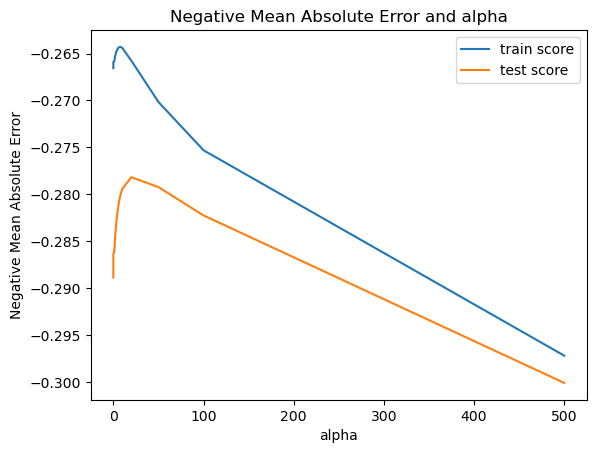

In [86]:
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [99]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
17,LowQualFinSF,0.378991
18,GrLivArea,0.374059
1,LotArea,0.359678
6,ExterQual,0.336053
5,MasVnrArea,0.241586
19,BsmtFullBath,0.232391
12,BsmtUnfSF,0.143820
7,BsmtQual,0.132632
2,OverallQual,0.130730
4,YearRemodAdd,0.114717


In [87]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.27816567854821594


### Lasso

In [88]:
lasso = Lasso()
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
lasso_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
print(lasso_cv.best_params_)


{'alpha': 0.001}


In [90]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train)

Lasso(alpha=0.001)

In [91]:
from sklearn import metrics
y_train_pred = lasso.predict(X_train_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8207239904060384


In [92]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=148)

In [93]:
X_test.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=148)

In [94]:
y_test_pred = lasso.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8185920079994012


In [95]:
Lasso_results = pd.DataFrame(lasso_cv.cv_results_)
Lasso_results = Lasso_results[Lasso_results['param_alpha']<=500]
Lasso_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.001,-0.269635,-0.286558,1
0,0.0001,-0.270431,-0.289823,2
2,0.01,-0.281633,-0.290571,3
3,0.05,-0.309390,-0.313433,4
4,0.1,-0.325964,-0.328370,5
5,0.2,-0.384274,-0.386022,6
6,0.3,-0.433454,-0.434972,7
7,0.4,-0.497262,-0.498363,8
8,0.5,-0.554627,-0.555621,9
9,0.6,-0.610857,-0.611517,10


In [100]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)


,Featuere,Coef
17,LowQualFinSF,0.597685
18,GrLivArea,0.532774
6,ExterQual,0.365204
1,LotArea,0.343487
19,BsmtFullBath,0.289354
5,MasVnrArea,0.249815
12,BsmtUnfSF,0.174436
2,OverallQual,0.138300
21,FullBath,0.124792
7,BsmtQual,0.118830


In [96]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

0.8207239904060384
0.8185920079994012
183.04080579543475
81.82098436990604
0.17927600959396156
0.18680590038791334


,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.821768,0.814661,0.820724
1,R2 Score (Test),0.819220,0.817165,0.818592
2,RSS (Train),181.975371,189.231483,183.040806
3,RSS (Test),81.537641,82.464402,81.820984
4,MSE (Train),0.422176,0.430511,0.423410
5,MSE (Test),0.431461,0.433907,0.432210


In [97]:
beta_val = pd.DataFrame(index=X.columns)
beta_val.rows = X.columns
beta_val['Linear'] = lm.params
beta_val['Ridge'] = ridge.coef_
beta_val['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
beta_val.head(68)


,Linear,Ridge,Lasso
OverallQual,0.337441,0.359678,0.343487
BsmtExposure,0.139424,0.130730,0.138300
BsmtUnfSF,-0.074901,-0.070688,-0.072662
TotalBsmtSF,0.096227,0.114717,0.096581
1stFlrSF,0.250280,0.241586,0.249815
2ndFlrSF,0.376336,0.336053,0.365204
GarageCars,0.115218,0.132632,0.118830
MSSubClass_90,-0.295655,-0.184457,-0.262289
MSSubClass_160,-0.196629,-0.149807,-0.208594
MSSubClass_190,-0.236769,-0.121619,-0.190200
